In [1]:
using Plots
using Random
include("constrained_mps.jl")

initialization (generic function with 1 method)

## Cardinality 

Checking that the constrained tensor network can learn the cardinality dataset, that is the dataset formed by all bitstrings of fixed cardinality. We initialize the mps with blocks of random entries. After training the mps should sample all bitstrings of fixed cardinality equally likely.

In [2]:
function ind2state(x::Int, len::Int)
    bs_ = bitstring(x)
    bs = collect(bs_[end-len+1:end])
    bs .== '1'
end

Random.seed!(1)
N = 8
m = 2
A = rand(1:1, 2, N)
#A = [2   0   2  1  -2  -2  -2  0
#1  -1  -2  0   2   1   0  1]
#boundary_terms = [0, -1, 0, 0]
boundary_terms = [4, 4, 4, 4]
lb = [boundary_terms[1]; boundary_terms[2]]
ub = [boundary_terms[3]; boundary_terms[4]]
flux_mps = QRegion([Rectangle(lb[1],lb[2],ub[1],ub[2])])

mps, link_inds_backward, link_inds_forward = initialization(A, boundary_terms; ortho_center=1, block_dim=2)
normalize!(mps)
constrained_orthogonalize!(mps,1; left_canonical_indices=link_inds_forward, right_canonical_indices=link_inds_backward,flux_mps=flux_mps)
mps_ini = copy(mps);
#constrained_orthogonalize!(mps,8; left_canonical_indices=link_inds_forward, right_canonical_indices=link_inds_backward,flux_mps=flux_mps)
#constrained_orthogonalize!(mps,1; left_canonical_indices=link_inds_forward, right_canonical_indices=link_inds_backward,flux_mps=flux_mps)
@show mps[4]
@show constrained_factorize(mps[4], (inds(mps[4])[1], inds(mps[4])[2]); new_index=[link_inds_backward[4]])

i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
("tensor ", j) = ("tensor ", 2)
("tensor ", j) = ("tensor ", 3)
("tensor ", j) = ("tensor ", 4)
("tensor ", j) = ("tensor ", 5)
("tensor ", j) = ("tensor ", 6)
("tensor ", j) = ("tensor ", 7)
(b, norm(L * R - M[b + 1])) = (7, 1.2412670766236366e-16)
(b, norm(L * R - M[b + 1])) = (6, 3.9253844730565095e-16)
(b, norm(L * R - M[b + 1])) = (5, 3.0940387085199507e-16)
(b, norm(L * R - M[b + 1])) = (4, 6.090118307676399e-16)
(b, norm(L * R - M[b + 1])) = (3, 2.782974436717122e-16)
(b, norm(L * R - M[b + 1])) = (2, 4.639615146803665e-16)
(b, norm(L * R - M[b + 1])) = (1, 4.569251427581713e-16)
mps[4] = ITensor ord=3
Dim 1: (dim=2|id=612) <In>
 1: QN(("qx",0),("qy",0)) => 1
 2: QN(("qx",1),("qy",1)) => 1
Dim 2: (dim=8|id=493) <In>
 1: QRegion([Rectangle(0, 0, 0, 0)]) => 1
 2: QRegion([Rectangle(1, 1

(ITensor ord=3
Dim 1: (dim=2|id=612) <In>
 1: QN(("qx",0),("qy",0)) => 1
 2: QN(("qx",1),("qy",1)) => 1
Dim 2: (dim=8|id=493) <In>
 1: QRegion([Rectangle(0, 0, 0, 0)]) => 1
 2: QRegion([Rectangle(1, 1, 1, 1)]) => 2
 3: QRegion([Rectangle(2, 2, 2, 2)]) => 2
 4: QRegion([Rectangle(3, 3, 3, 3)]) => 2
 5: QRegion([Rectangle(4, 4, 4, 4)]) => 1
Dim 3: (dim=8|id=566) <Out>
 1: QRegion([Rectangle(1, 1, 1, 1)]) => 2
 2: QRegion([Rectangle(2, 2, 2, 2)]) => 2
 3: QRegion([Rectangle(3, 3, 3, 3)]) => 2
 4: QRegion([Rectangle(4, 4, 4, 4)]) => 2
BlockSparse{Float64, Vector{Float64}, 3}
 2×8×8
Block(2, 1, 1)
 [2:2, 1:1, 1:2]
[:, :, 1] =
 0.032600370657130166

[:, :, 2] =
 -0.13513115857431357

Block(1, 2, 1)
 [1:1, 2:3, 1:2]
[:, :, 1] =
 -0.0684287313744409  0.9971232243587059

[:, :, 2] =
 0.9881912004403749  0.07223379648457576

Block(2, 2, 2)
 [2:2, 2:3, 3:4]
[:, :, 1] =
 -0.614098549825957  -0.051334325380974516

[:, :, 2] =
 -0.6551259610912896  -0.44884104396069857

Block(1, 3, 2)
 [1:1, 4:5, 3:

In [3]:
n_valid = 0
seed_samples = Vector{Vector{Int}}()
for i in 1:2^N
    bs = Vector{Int}(ind2state(i, N))
    if sum(bs) == 4
        push!(seed_samples, bs)
        global n_valid += 1
    end
end

num_train_samples = Int(n_valid)
training_samples = Matrix{Int}(undef, num_train_samples, N)
for i in 1:num_train_samples
    training_samples[i,:] = seed_samples[i]
end


learning_rate = Float32(1E-2)
num_training_steps = 100
max_bond_dim = 20
train_params = TrainParams(learning_rate, num_training_steps, max_bond_dim);

In [4]:
nll_vector, mps = training(train_params, mps, training_samples; left_canonical_indices=link_inds_forward, right_canonical_indices=link_inds_backward, flux_mps=flux_mps);

(b, norm(L * R - M[b])) = (1, 1.1107649934270853e-16)
(b, norm(L * R - M[b])) = (2, 2.0048818446196214e-16)
(b, norm(L * R - M[b])) = (3, 1.882659552422636e-16)
(b, norm(L * R - M[b])) = (4, 1.305735965035601e-16)
(b, norm(L * R - M[b])) = (5, 1.398217320242665e-16)
(b, norm(L * R - M[b])) = (6, 2.3488864108716846e-16)
(b, norm(L * R - M[b])) = (7, 2.237994986951949e-16)
(b, norm(L * R - M[b + 1])) = (7, 0.0)
(b, norm(L * R - M[b + 1])) = (6, 1.734723475976807e-17)
(b, norm(L * R - M[b + 1])) = (5, 2.9541276310451896e-17)
(b, norm(L * R - M[b + 1])) = (4, 1.6945604787106037e-16)
(b, norm(L * R - M[b + 1])) = (3, 4.2096475383310346e-16)
(b, norm(L * R - M[b + 1])) = (2, 1.499206600309199e-16)
(b, norm(L * R - M[b + 1])) = (1, 1.570188286597971e-16)
(b, norm(L * R - M[b])) = (1, 0.0)
(b, norm(L * R - M[b])) = (2, 1.122119393282911e-16)
(b, norm(L * R - M[b])) = (3, 1.252369433697723e-16)
(b, norm(L * R - M[b])) = (4, 1.6504961764177468e-16)
(b, norm(L * R - M[b])) = (5, 1.84289494770667e

In [5]:
@show mps[4]

mps[4] = ITensor ord=3
Dim 1: (dim=2|id=612) <In>
 1: QN(("qx",0),("qy",0)) => 1
 2: QN(("qx",1),("qy",1)) => 1
Dim 2: (dim=8|id=711) <In>
 1: QRegion([Rectangle(0, 0, 0, 0)]) => 1
 2: QRegion([Rectangle(1, 1, 1, 1)]) => 2
 3: QRegion([Rectangle(2, 2, 2, 2)]) => 2
 4: QRegion([Rectangle(3, 3, 3, 3)]) => 2
 5: QRegion([Rectangle(4, 4, 4, 4)]) => 1
Dim 3: (dim=6|id=192) <Out>
 1: QRegion([Rectangle(1, 1, 1, 1)]) => 1
 2: QRegion([Rectangle(2, 2, 2, 2)]) => 2
 3: QRegion([Rectangle(3, 3, 3, 3)]) => 2
 4: QRegion([Rectangle(4, 4, 4, 4)]) => 1
BlockSparse{Float64, Vector{Float64}, 3}
 2×8×6
Block(2, 1, 1)
 [2:2, 1:1, 1:1]
[:, :, 1] =
 0.44721358732136074

Block(1, 2, 1)
 [1:1, 2:3, 1:1]
[:, :, 1] =
 -0.8944271950892146  -1.363864632094321e-9

Block(2, 2, 2)
 [2:2, 2:3, 2:3]
[:, :, 1] =
 -0.6324555320539615  3.9543547536039767e-10

[:, :, 2] =
 0.7745963126601477  -0.0009234378899271757

Block(1, 3, 2)
 [1:1, 4:5, 2:3]
[:, :, 1] =
 0.7745966692249204  -5.12522670506799e-10

[:, :, 2] =
 0.63

ITensor ord=3
(dim=2|id=612) <In>
 1: QN(("qx",0),("qy",0)) => 1
 2: QN(("qx",1),("qy",1)) => 1
(dim=8|id=711) <In>
 1: QRegion([Rectangle(0, 0, 0, 0)]) => 1
 2: QRegion([Rectangle(1, 1, 1, 1)]) => 2
 3: QRegion([Rectangle(2, 2, 2, 2)]) => 2
 4: QRegion([Rectangle(3, 3, 3, 3)]) => 2
 5: QRegion([Rectangle(4, 4, 4, 4)]) => 1
(dim=6|id=192) <Out>
 1: QRegion([Rectangle(1, 1, 1, 1)]) => 1
 2: QRegion([Rectangle(2, 2, 2, 2)]) => 2
 3: QRegion([Rectangle(3, 3, 3, 3)]) => 2
 4: QRegion([Rectangle(4, 4, 4, 4)]) => 1
BlockSparse{Float64, Vector{Float64}, 3}

Let's plot the training NLL loss function. 

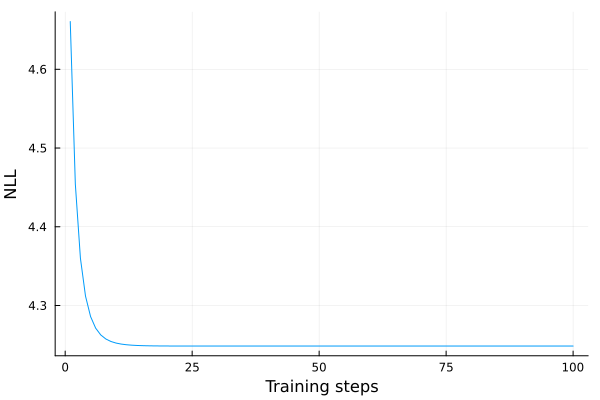

In [6]:
plot(nll_vector)
plot!(xlabel="Training steps")
plot!(ylabel="NLL")
plot!(legend=false)

This is the expected NLL loss function value for the cardinality dataset, with value $$\log \binom{8}{4} \approx 4.25.$$

Next we confirm that the amplitudes for each valid bitstring (of valid cardinality) are indeed all equal. For comparison we also show the amplitudes of the initial mps, showing that indeed the mps was able to learn the target distribution.

In [7]:
contracted_mps = mps[1] * mps[2] * mps[3] * mps[4] * mps[5] * mps[6] * mps[7] * mps[8]
contracted_mps_ini = mps_ini[1] * mps_ini[2] * mps_ini[3] * mps_ini[4] * mps_ini[5] * mps_ini[6] * mps_ini[7] * mps_ini[8]
loss_ll = 0
count1 = 0 
count2 = 0
for j1 in 0:1 
    for j2 in 0:1 
        for j3 in 0:1 
            for j4 in 0:1 
                for j5 in 0:1 
                    for j6 in 0:1 
                        for j7 in 0:1
                            for j8 in 0:1
                                i1=j1+1; i2=j2+1; i3=j3+1; i4=j4+1; i5=j5+1; i6=j6+1; i7=j7+1; i8=j8+1;
                                if contracted_mps[i1,i2,i3,i4,i5,i6,i7,i8] != 0 
                                    global sol = (j1,j2,j3,j4,j5,j6,j7,j8) 
                                    #@show contracted_mps
                                    @show sol
                                    @show (contracted_mps[i1,i2,i3,i4,i5,i6,i7,i8])^2
                                    @show (contracted_mps_ini[i1,i2,i3,i4,i5,i6,i7,i8])^2
                                    global loss_ll += log((contracted_mps[i1,i2,i3,i4,i5,i6,i7,i8])^2)
                                end
                            end
                        end
                    end 
                end
            end 
        end 
    end 
end

sol = (0, 0, 0, 0, 1, 1, 1, 1)
contracted_mps[i1, i2, i3, i4, i5, i6, i7, i8] ^ 2 = 0.014285713569266464
contracted_mps_ini[i1, i2, i3, i4, i5, i6, i7, i8] ^ 2 = 0.030007722590109715
sol = (0, 0, 0, 1, 0, 1, 1, 1)
contracted_mps[i1, i2, i3, i4, i5, i6, i7, i8] ^ 2 = 0.014285714205097774
contracted_mps_ini[i1, i2, i3, i4, i5, i6, i7, i8] ^ 2 = 0.03413866347052931
sol = (0, 0, 0, 1, 1, 0, 1, 1)
contracted_mps[i1, i2, i3, i4, i5, i6, i7, i8] ^ 2 = 0.014285714672236724
contracted_mps_ini[i1, i2, i3, i4, i5, i6, i7, i8] ^ 2 = 0.00104377025599426
sol = (0, 0, 0, 1, 1, 1, 0, 1)
contracted_mps[i1, i2, i3, i4, i5, i6, i7, i8] ^ 2 = 0.01428571452878502
contracted_mps_ini[i1, i2, i3, i4, i5, i6, i7, i8] ^ 2 = 0.002815679397158337
sol = (0, 0, 0, 1, 1, 1, 1, 0)
contracted_mps[i1, i2, i3, i4, i5, i6, i7, i8] ^ 2 = 0.014285714523227444
contracted_mps_ini[i1, i2, i3, i4, i5, i6, i7, i8] ^ 2 = 0.01490139507377936
sol = (0, 0, 1, 0, 0, 1, 1, 1)
contracted_mps[i1, i2, i3, i4, i5, i6, i7, i8] ^ 2 = 0.014

# Inequality 

Next we check that the learning algorithm also applies for datasets formed by bitstrings obeying inequality constraints. In this case we consider two arbitrary inequalities, compute its solutions by hand, and train an mps to product all these samples with equal probability. 

In [8]:
N = 8
m = 2
A = [2   0   2  1  -2  -2  -2  0
1  -1  -2  0   2   1   0  1]
boundary_terms = [0, -1, 0, 0]
lb = [boundary_terms[1]; boundary_terms[2]]
ub = [boundary_terms[3]; boundary_terms[4]]
flux_mps = QRegion([Rectangle(lb[1],lb[2],ub[1],ub[2])])

mps, link_inds_backward, link_inds_forward = initialization(A, boundary_terms; ortho_center=1, block_dim=1)

normalize!(mps)
constrained_orthogonalize!(mps,1; left_canonical_indices=link_inds_forward, right_canonical_indices=link_inds_backward,flux_mps=flux_mps)
mps_ini = copy(mps)


n_valid = 0
seed_samples = Vector{Vector{Int}}()
for i in 1:2^N
    bs = Vector{Int}(ind2state(i, N))
    if all(lb .<= A * bs .<= ub)
        push!(seed_samples, bs)
        global n_valid += 1
    end
end

num_train_samples = Int(n_valid)
training_samples = Matrix{Int}(undef, num_train_samples, N)
for i in 1:num_train_samples
    training_samples[i,:] = seed_samples[i]
end


learning_rate = Float32(1E-2)
num_training_steps = 40
max_bond_dim = 8
train_params = TrainParams(learning_rate, num_training_steps, max_bond_dim)

i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
("tensor ", j) = ("tensor ", 2)
("tensor ", j) = ("tensor ", 3)
("tensor ", j) = ("tensor ", 4)
("tensor ", j) = ("tensor ", 5)
("tensor ", j) = ("tensor ", 6)
("tensor ", j) = ("tensor ", 7)
(b, norm(L * R - M[b + 1])) = (7, 0.0)
(b, norm(L * R - M[b + 1])) = (6, 0.0)
(b, norm(L * R - M[b + 1])) = (5, 6.206335383118183e-17)
(b, norm(L * R - M[b + 1])) = (4, 5.551115123125783e-17)
(b, norm(L * R - M[b + 1])) = (3, 0.0)
(b, norm(L * R - M[b + 1])) = (2, 1.5978300543325405e-16)
(b, norm(L * R - M[b + 1])) = (1, 1.8723264332899482e-16)


TrainParams(0.01f0, 40, 8, 0.0f0)

In [9]:
nll_vector, mps = training(train_params, mps, training_samples; left_canonical_indices=link_inds_forward, right_canonical_indices=link_inds_backward, flux_mps=flux_mps)

(b, norm(L * R - M[b])) = (1, 0.0)
(b, norm(L * R - M[b])) = (2, 1.2719202621569003e-16)
(b, norm(L * R - M[b])) = (3, 1.1443916996305594e-16)
(b, norm(L * R - M[b])) = (4, 1.3018518929051675e-16)
(b, norm(L * R - M[b])) = (5, 2.1138016631127878e-16)
(b, norm(L * R - M[b])) = (6, 1.6008405705285788e-16)
(b, norm(L * R - M[b])) = (7, 3.7063048078027744e-16)
(b, norm(L * R - M[b + 1])) = (7, 1.3877787807814457e-16)
(b, norm(L * R - M[b + 1])) = (6, 9.621071039760154e-17)
(b, norm(L * R - M[b + 1])) = (5, 1.4687126231336601e-16)
(b, norm(L * R - M[b + 1])) = (4, 1.6883057536160649e-16)
(b, norm(L * R - M[b + 1])) = (3, 1.4152771671864685e-16)
(b, norm(L * R - M[b + 1])) = (2, 3.4555419773428114e-16)
(b, norm(L * R - M[b + 1])) = (1, 1.4687895554302877e-16)
(b, norm(L * R - M[b])) = (1, 0.0)
(b, norm(L * R - M[b])) = (2, 9.614813431917819e-17)
(b, norm(L * R - M[b])) = (3, 1.0385276003874261e-16)
(b, norm(L * R - M[b])) = (4, 1.0007438598656331e-16)
(b, norm(L * R - M[b])) = (5, 1.59443642

(Any[3.0569678172803396, 2.8503099486745573, 2.7726325233966307, 2.7392881477286672, 2.7237302513968196, 2.716128198780387, 2.712373629573669, 2.710477658469793, 2.7094856574759336, 2.708939948702336  …  2.708050776553575, 2.7080506140010656, 2.7080504973787045, 2.7080504137038948, 2.7080503536656195, 2.708050310585268, 2.7080502796719443, 2.70805025748865, 2.7080502415695324, 2.708050230145386], MPS
[1] ((dim=2|id=121) <In>
 1: QN(("qx",0),("qy",0)) => 1
 2: QN(("qx",2),("qy",1)) => 1, (dim=2|id=386) <In>
 1: QRegion([Rectangle(-2, -2, -2, -1)]) => 1
 2: QRegion([Rectangle(0, -1, 0, 0)]) => 1)
[2] ((dim=2|id=251) <In>
 1: QN(("qx",0),("qy",0)) => 1
 2: QN(("qx",0),("qy",-1)) => 1, (dim=6|id=821) <In>
 1: QRegion([Rectangle(-2, -1, -2, -1)]) => 1
 2: QRegion([Rectangle(-2, 0, -2, 0)]) => 1
 3: QRegion([Rectangle(0, -1, 0, -1)]) => 1
 4: QRegion([Rectangle(0, 0, 0, 0)]) => 2
 5: QRegion([Rectangle(0, 1, 0, 1)]) => 1, (dim=2|id=386) <Out>
 1: QRegion([Rectangle(-2, -2, -2, -1)]) => 1
 2:

Let's plot the training curve.

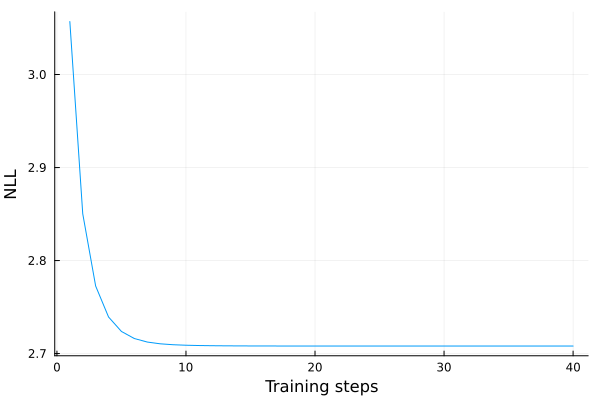

In [10]:
plot(nll_vector)
plot!(xlabel="Training steps")
plot!(ylabel="NLL")
plot!(legend=false)

We see that the final NLL is close to the target one, corresponding to $$\log(15) \approx 2.71,$$ since there are 15 solutions to the above set of inequalities.

Let's now confirm that all amplitudes are equally probable, and compare against the untrained mps amplitudes.

In [20]:
contracted_mps = mps[1] * mps[2] * mps[3] * mps[4] * mps[5] * mps[6] * mps[7] * mps[8]
contracted_mps_ini = mps_ini[1] * mps_ini[2] * mps_ini[3] * mps_ini[4] * mps_ini[5] * mps_ini[6] * mps_ini[7] * mps_ini[8]
loss_ll = 0
count1 = 0 
count2 = 0
for j1 in 0:1 
    for j2 in 0:1 
        for j3 in 0:1 
            for j4 in 0:1 
                for j5 in 0:1 
                    for j6 in 0:1 
                        for j7 in 0:1
                            for j8 in 0:1
                                i1=j1+1; i2=j2+1; i3=j3+1; i4=j4+1; i5=j5+1; i6=j6+1; i7=j7+1; i8=j8+1;
                                if contracted_mps[i1,i2,i3,i4,i5,i6,i7,i8] != 0 
                                    global sol = (j1,j2,j3,j4,j5,j6,j7,j8) 
                                    #@show contracted_mps
                                    @show sol
                                    @show (contracted_mps[i1,i2,i3,i4,i5,i6,i7,i8])^2
                                    @show (contracted_mps_ini[i1,i2,i3,i4,i5,i6,i7,i8])^2
                                    global loss_ll += log((contracted_mps[i1,i2,i3,i4,i5,i6,i7,i8])^2)
                                end
                            end
                        end
                    end 
                end
            end 
        end 
    end 
end

sol = (0, 0, 0, 0, 0, 0, 0, 0)
contracted_mps[i1, i2, i3, i4, i5, i6, i7, i8] ^ 2 = 0.06666810014794887
contracted_mps_ini[i1, i2, i3, i4, i5, i6, i7, i8] ^ 2 = 0.0005687965421190623
sol = (0, 0, 1, 0, 0, 0, 1, 1)
contracted_mps[i1, i2, i3, i4, i5, i6, i7, i8] ^ 2 = 0.06666750876805867
contracted_mps_ini[i1, i2, i3, i4, i5, i6, i7, i8] ^ 2 = 2.7523674328979534e-5
sol = (0, 0, 1, 0, 0, 1, 0, 0)
contracted_mps[i1, i2, i3, i4, i5, i6, i7, i8] ^ 2 = 0.066665694086046
contracted_mps_ini[i1, i2, i3, i4, i5, i6, i7, i8] ^ 2 = 1.8882984143351162e-9
sol = (0, 0, 1, 0, 0, 1, 0, 1)
contracted_mps[i1, i2, i3, i4, i5, i6, i7, i8] ^ 2 = 0.06666653632444554
contracted_mps_ini[i1, i2, i3, i4, i5, i6, i7, i8] ^ 2 = 0.0277988695462033
sol = (0, 0, 1, 0, 1, 0, 0, 0)
contracted_mps[i1, i2, i3, i4, i5, i6, i7, i8] ^ 2 = 0.0666681218084733
contracted_mps_ini[i1, i2, i3, i4, i5, i6, i7, i8] ^ 2 = 0.001610425021668228
sol = (0, 1, 0, 0, 0, 0, 0, 0)
contracted_mps[i1, i2, i3, i4, i5, i6, i7, i8] ^ 2 = 0.066666

In [81]:
N = 8
m = 2
A = rand(1:1, 2, N)
boundary_terms = [4, 4, 4, 4]
lb = [boundary_terms[1]; boundary_terms[2]]
ub = [boundary_terms[3]; boundary_terms[4]]
flux_mps = QRegion([Rectangle(lb[1],lb[2],ub[1],ub[2])])

n_valid = 0
seed_samples = Vector{Vector{Int}}()
for i in 1:2^N
    bs = Vector{Int}(ind2state(i, N))
    if sum(bs) == 4
        push!(seed_samples, bs)
        global n_valid += 1
    end
end

Random.seed!(1)

num_train_samples = Int(0.5*n_valid)
training_samples = Matrix{Int}(undef, num_train_samples, N)
for i in 1:num_train_samples
    training_samples[i,:] = seed_samples[rand(1:num_train_samples)]
end

mps, link_inds_backward, link_inds_forward = initialization(A, boundary_terms; ortho_center=1, block_dim=3)
normalize!(mps)
constrained_orthogonalize!(mps,1; left_canonical_indices=link_inds_forward, right_canonical_indices=link_inds_backward,flux_mps=flux_mps)
mps_ini = copy(mps);

learning_rate = Float32(1E-2)
num_training_steps = 500
max_bond_dim = 20
train_params = TrainParams(learning_rate, num_training_steps, max_bond_dim);

nll_vector, mps = training(train_params, mps, training_samples; left_canonical_indices=link_inds_forward, right_canonical_indices=link_inds_backward, flux_mps=flux_mps);

i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
("tensor ", j) = ("tensor ", 2)
("tensor ", j) = ("tensor ", 3)
("tensor ", j) = ("tensor ", 4)
("tensor ", j) = ("tensor ", 5)
("tensor ", j) = ("tensor ", 6)
("tensor ", j) = ("tensor ", 7)
(b, norm(L * R - M[b + 1])) = (7, 3.179800655392251e-17)
(b, norm(L * R - M[b + 1])) = (6, 1.2198695867152973e-16)
(b, norm(L * R - M[b + 1])) = (5, 5.091701529339939e-16)
(b, norm(L * R - M[b + 1])) = (4, 5.056570314507692e-16)
(b, norm(L * R - M[b + 1])) = (3, 7.1782790289644575e-16)
(b, norm(L * R - M[b + 1])) = (2, 8.439123674435813e-16)
(b, norm(L * R - M[b + 1])) = (1, 7.999487856912382e-16)
(b, norm(L * R - M[b])) = (1, 1.1188630228279524e-16)
(b, norm(L * R - M[b])) = (2, 4.776614326372477e-16)
(b, norm(L * R - M[b])) = (3, 9.784796964319142e-16)
(b, norm(L * R - M[b])) = (4, 2.802664778511507e-

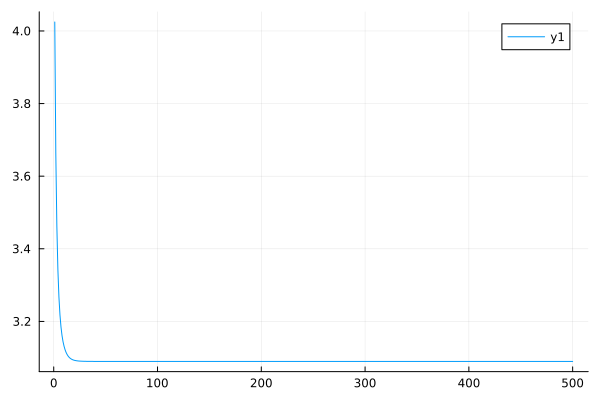

In [82]:
plot(nll_vector)

In [70]:
training_samples_vec = Vector{Vector{Int}}()
for i in 1:num_train_samples 
    push!(training_samples_vec, training_samples[i,:])
end

# Function to compute the integer representation value of a boolean vector
int_value(bool_vec) = parse(Int, join(map(Int, bool_vec), ""), base=2)


# Compute the integer representation values for each boolean vector
int_values = [int_value(bool_vec) for bool_vec in training_samples_vec]

# Sort the indices of the boolean vectors based on their integer representation values
sorted_indices = sortperm(int_values)

# Reorder the rows of the matrix based on the sorted indices
sorted_matrix = training_samples[sorted_indices, :]
for i in 1:35 
    print(sorted_matrix[i,:], "\n")
    #@show sorted_indices[i]
end
#@show sorted_indices


[0, 0, 0, 0, 1, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 1, 1]
[0, 0, 0, 1, 1, 0, 1, 1]
[0, 0, 0, 1, 1, 1, 1, 0]
[0, 0, 1, 0, 0, 1, 1, 1]
[0, 0, 1, 0, 1, 0, 1, 1]
[0, 0, 1, 0, 1, 0, 1, 1]
[0, 0, 1, 1, 0, 0, 1, 1]
[0, 0, 1, 1, 0, 1, 0, 1]
[0, 0, 1, 1, 0, 1, 0, 1]
[0, 0, 1, 1, 1, 0, 0, 1]
[0, 0, 1, 1, 1, 0, 0, 1]
[0, 0, 1, 1, 1, 0, 1, 0]
[0, 0, 1, 1, 1, 1, 0, 0]
[0, 1, 0, 0, 0, 1, 1, 1]
[0, 1, 0, 0, 0, 1, 1, 1]
[0, 1, 0, 0, 1, 1, 0, 1]
[0, 1, 0, 1, 0, 0, 1, 1]
[0, 1, 0, 1, 0, 0, 1, 1]
[0, 1, 0, 1, 0, 0, 1, 1]
[0, 1, 0, 1, 0, 1, 1, 0]
[0, 1, 0, 1, 0, 1, 1, 0]
[0, 1, 0, 1, 0, 1, 1, 0]
[0, 1, 0, 1, 1, 0, 1, 0]
[0, 1, 0, 1, 1, 0, 1, 0]
[0, 1, 0, 1, 1, 1, 0, 0]
[0, 1, 1, 0, 0, 0, 1, 1]
[0, 1, 1, 0, 0, 1, 0, 1]
[0, 1, 1, 0, 0, 1, 1, 0]
[0, 1, 1, 0, 1, 0, 0, 1]
[0, 1, 1, 0, 1, 0, 1, 0]
[0, 1, 1, 0, 1, 1, 0, 0]
[0, 1, 1, 0, 1, 1, 0, 0]
[0, 1, 1, 1, 0, 0, 0, 1]
[0, 1, 1, 1, 0, 0, 1, 0]


In [73]:
target_loss = -(15/35*log(1/35)+2/35*log(2/35)*7+3/35*log(3/35)*2)
@show target_loss
@show nll_vector

target_loss = 3.0897556540651885
nll_vector = Any[4.024717229052157, 3.662387674873345, 3.4635459005691738, 3.3431899903411924, 3.2675652536900865, 3.2180229123024673, 3.1843353557491065, 3.1606892864339704, 3.1436048721327245, 3.1309261599123803, 3.1213176803836067, 3.1139533355104683, 3.1082944886471675, 3.103955255820386, 3.100638884759509, 3.098111220824592, 3.0961877155670328, 3.094724388767712, 3.0936101393873274, 3.092760025937216, 3.092109561524526, 3.091610031350892, 3.091224753726523, 3.0909261557473986, 3.0906935210437276, 3.090511274799144, 3.09036768881617, 3.0902539097130175, 3.0901632327480777, 3.090090560709899, 3.0900320013335927, 3.0899845679205225, 3.089945956597743, 3.089914380378205, 3.0898884452796715, 3.0898670575868143, 3.0898493541930265, 3.089834650073211, 3.089822398500435, 3.0898121607699256, 3.0898035830398527, 3.0897963785202203, 3.0897903136981344, 3.0897851976238315, 3.089780873529381, 3.0897772122345835, 3.089774106929736, 3.089771469025054, 3.089769224

200-element Vector{Any}:
 4.024717229052157
 3.662387674873345
 3.4635459005691738
 3.3431899903411924
 3.2675652536900865
 3.2180229123024673
 3.1843353557491065
 3.1606892864339704
 3.1436048721327245
 3.1309261599123803
 3.1213176803836067
 3.1139533355104683
 3.1082944886471675
 ⋮
 3.0897556540674778
 3.0897556540672726
 3.089755654067086
 3.0897556540669164
 3.0897556540667597
 3.0897556540666207
 3.0897556540664923
 3.089755654066377
 3.08975565406627
 3.089755654066172
 3.089755654066085
 3.0897556540660047

In [83]:
contracted_mps = mps[1] * mps[2] * mps[3] * mps[4] * mps[5] * mps[6] * mps[7] * mps[8]
contracted_mps_ini = mps_ini[1] * mps_ini[2] * mps_ini[3] * mps_ini[4] * mps_ini[5] * mps_ini[6] * mps_ini[7] * mps_ini[8]
loss_ll = 0
count1 = 0 
count2 = 0
for j1 in 0:1 
    for j2 in 0:1 
        for j3 in 0:1 
            for j4 in 0:1 
                for j5 in 0:1 
                    for j6 in 0:1 
                        for j7 in 0:1
                            for j8 in 0:1
                                i1=j1+1; i2=j2+1; i3=j3+1; i4=j4+1; i5=j5+1; i6=j6+1; i7=j7+1; i8=j8+1;
                                if contracted_mps[i1,i2,i3,i4,i5,i6,i7,i8] != 0 
                                    global sol = (j1,j2,j3,j4,j5,j6,j7,j8) 
                                    #@show contracted_mps
                                    @show sol
                                    @show (contracted_mps[i1,i2,i3,i4,i5,i6,i7,i8])^2
                                    @show (contracted_mps_ini[i1,i2,i3,i4,i5,i6,i7,i8])^2
                                    global loss_ll += log((contracted_mps[i1,i2,i3,i4,i5,i6,i7,i8])^2)
                                end
                            end
                        end
                    end 
                end
            end 
        end 
    end 
end

sol = (0, 0, 0, 0, 1, 1, 1, 1)
contracted_mps[i1, i2, i3, i4, i5, i6, i7, i8] ^ 2 = 0.057142857142857564
contracted_mps_ini[i1, i2, i3, i4, i5, i6, i7, i8] ^ 2 = 0.0017131635350556356
sol = (0, 0, 0, 1, 0, 1, 1, 1)
contracted_mps[i1, i2, i3, i4, i5, i6, i7, i8] ^ 2 = 2.337559360203126e-25
contracted_mps_ini[i1, i2, i3, i4, i5, i6, i7, i8] ^ 2 = 0.0012566007460662718
sol = (0, 0, 0, 1, 1, 0, 1, 1)
contracted_mps[i1, i2, i3, i4, i5, i6, i7, i8] ^ 2 = 0.028571428571455178
contracted_mps_ini[i1, i2, i3, i4, i5, i6, i7, i8] ^ 2 = 0.0007496059119238783
sol = (0, 0, 0, 1, 1, 1, 0, 1)
contracted_mps[i1, i2, i3, i4, i5, i6, i7, i8] ^ 2 = 3.8951005092544725e-25
contracted_mps_ini[i1, i2, i3, i4, i5, i6, i7, i8] ^ 2 = 0.006782806022344934
sol = (0, 0, 0, 1, 1, 1, 1, 0)
contracted_mps[i1, i2, i3, i4, i5, i6, i7, i8] ^ 2 = 0.02857142857139797
contracted_mps_ini[i1, i2, i3, i4, i5, i6, i7, i8] ^ 2 = 0.0472118652452968
sol = (0, 0, 1, 0, 0, 1, 1, 1)
contracted_mps[i1, i2, i3, i4, i5, i6, i7, i8] ^ 2 

In [86]:
@show mps[4]

mps[4] * mps[5] = ITensor ord=4
Dim 1: (dim=2|id=209) <In>
 1: QN(("qx",0),("qy",0)) => 1
 2: QN(("qx",1),("qy",1)) => 1
Dim 2: (dim=4|id=520) <Out>
 1: QRegion([Rectangle(2, 2, 2, 2)]) => 1
 2: QRegion([Rectangle(3, 3, 3, 3)]) => 2
 3: QRegion([Rectangle(4, 4, 4, 4)]) => 1
Dim 3: (dim=2|id=7) <In>
 1: QN(("qx",0),("qy",0)) => 1
 2: QN(("qx",1),("qy",1)) => 1
Dim 4: (dim=7|id=503) <In>
 1: QRegion([Rectangle(1, 1, 1, 1)]) => 3
 2: QRegion([Rectangle(2, 2, 2, 2)]) => 3
 3: QRegion([Rectangle(3, 3, 3, 3)]) => 1
BlockSparse{Float64, Vector{Float64}, 4}
 2×4×2×7
Block(2, 1, 1, 1)
 [2:2, 1:1, 1:1, 1:3]
[:, :, 1, 1] =
 0.3902264707771584

[:, :, 1, 2] =
 -0.18551185347428448

[:, :, 1, 3] =
 0.18849635526333042

Block(1, 1, 2, 1)
 [1:1, 1:1, 2:2, 1:3]
[:, :, 1, 1] =
 0.651970433377903

[:, :, 1, 2] =
 0.03725119779170471

[:, :, 1, 3] =
 -0.1341318258600135

Block(1, 1, 1, 2)
 [1:1, 1:1, 1:1, 4:6]
[:, :, 1, 1] =
 -0.5413379232191413

[:, :, 1, 2] =
 0.1568284343360916

[:, :, 1, 3] =
 0.1252

ITensor ord=4
(dim=2|id=209) <In>
 1: QN(("qx",0),("qy",0)) => 1
 2: QN(("qx",1),("qy",1)) => 1
(dim=4|id=520) <Out>
 1: QRegion([Rectangle(2, 2, 2, 2)]) => 1
 2: QRegion([Rectangle(3, 3, 3, 3)]) => 2
 3: QRegion([Rectangle(4, 4, 4, 4)]) => 1
(dim=2|id=7) <In>
 1: QN(("qx",0),("qy",0)) => 1
 2: QN(("qx",1),("qy",1)) => 1
(dim=7|id=503) <In>
 1: QRegion([Rectangle(1, 1, 1, 1)]) => 3
 2: QRegion([Rectangle(2, 2, 2, 2)]) => 3
 3: QRegion([Rectangle(3, 3, 3, 3)]) => 1
BlockSparse{Float64, Vector{Float64}, 4}